<font size="10"> 

Assignment  1:  Wooldridge Data and Summary Stats 

<font size="5"> 

Author: Michael Zhao 


<font size="8">  <span style="color:darkblue"> Prep </span>

<font size="3"> Before we try to answer the questions, we need to get everything ready to use.

In [1]:

# import neccesary package 
import wooldridge as woo
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import termcolor as tm

# set up neccesary data
data1 = woo.dataWoo("fertil2")
data2 = woo.dataWoo("meap01")

#describe the data with only 3 decimal places
pd.options.display.float_format = "{:.3f}".format

<font size="8">  <span style="color:darkblue"> Question 1 </span>

a. How many observations are in this data set

In [2]:
#description of data
data1.describe()

,mnthborn,yearborn,age,electric,radio,tv,bicycle,educ,ceb,agefbrth,...,heduc,agesq,urban,urb_educ,spirit,protest,catholic,frsthalf,educ0,evermarr
count,4361.000,4361.000,4361.000,4358.000,4359.000,4359.000,4358.000,4361.000,4361.000,3273.000,...,1956.000,4361.000,4361.000,4361.000,4361.000,4361.000,4361.000,4361.000,4361.000,4361.000
mean,6.331,60.434,27.405,0.140,0.702,0.093,0.276,5.856,2.442,19.011,...,5.145,826.460,0.517,3.469,0.422,0.228,0.102,0.540,0.208,0.477
std,3.323,8.683,8.685,0.347,0.458,0.290,0.447,3.927,2.407,3.092,...,4.803,526.923,0.500,4.294,0.494,0.419,0.303,0.498,0.406,0.500
min,1.000,38.000,15.000,0.000,0.000,0.000,0.000,0.000,0.000,10.000,...,0.000,225.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3.000,55.000,20.000,0.000,0.000,0.000,0.000,3.000,1.000,17.000,...,0.000,400.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,6.000,62.000,26.000,0.000,1.000,0.000,0.000,7.000,2.000,19.000,...,6.000,676.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
75%,9.000,68.000,33.000,0.000,1.000,0.000,1.000,8.000,4.000,20.000,...,8.000,1089.000,1.000,7.000,1.000,0.000,0.000,1.000,0.000,1.000
max,12.000,73.000,49.000,1.000,1.000,1.000,1.000,20.000,13.000,38.000,...,20.000,2401.000,1.000,20.000,1.000,1.000,1.000,1.000,1.000,1.000


<span style="color:red"> There are 4361 observations, based on the first line 'count' in the data frame </span>

b. Describe the variable "yearborn". Show the average level of education for those born in the year on the 25% and 75% percentile

In [3]:
# describe "yearborn"
data1['yearborn'].describe()

count   4361.000
mean      60.434
std        8.683
min       38.000
25%       55.000
50%       62.000
75%       68.000
max       73.000
Name: yearborn, dtype: float64

In [4]:
# show the average level of education for those born in the year on the 25% and 75% percentile
edu25 = data1[data1['yearborn'] == 55]['educ'].mean()#number 55 is from the description of variable 'yearborn'
edu75 = data1[data1['yearborn'] == 68]['educ'].mean()#number 68 is from the description of variable 'yearborn'
print(f"The average for people born in the year on the 25% is {edu25:.3f}")
print(f"The average for people born in the year on the 75% is {edu75:.3f}")

The average for people born in the year on the 25% is 4.378
The average for people born in the year on the 75% is 7.069


c. Find the maximum number of children for households with TV in these data. 

In [5]:
max_kids = data1[data1['tv'] == 1]['children'].max()
print ("maximum number of children for households with TV in these data is ", max_kids)

maximum number of children for households with TV in these data is  9


d. Create a table where you present the average education and age at first birth by knowledge of birth control methods. What can you say about these results? 

In [6]:
crosstable = data1.groupby('knowmeth')[['educ', 'agefbrth']].mean() 
display(crosstable)

,educ,agefbrth
knowmeth,,
0.000,2.487,19.913
1.000,5.994,18.985


<span style="color:red">From the table, my opinion is that people have knowledge of birth control methods have higher years of education. Whether people have knowledge of birth control have no obvious affect on age of first birth</span>

<font size="8">  <span style="color:darkblue"> Question 2 </span>

a.  Find the correlation between math4, read4, lunch, and exppp. (Make a matrix and use a colored matrix like in the handout)  What do you conclude?

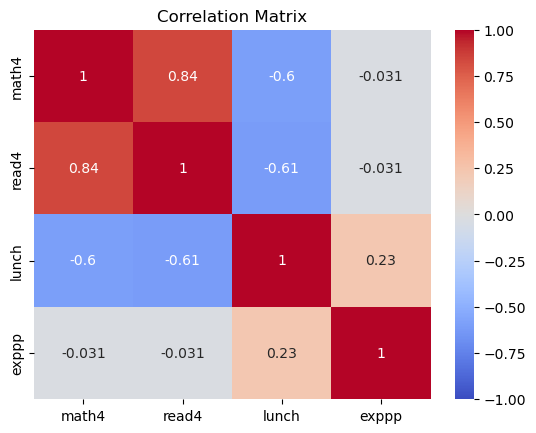

In [7]:
selected_columns = ['math4', 'read4', 'lunch', 'exppp']
correlation_matrix = data2[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1) # I used chat for the graph, I forgot everything about plotting with the 2 packages :(
plt.title('Correlation Matrix')
plt.show()

<span style="color:red">My conclusion is that there are strong postitive correlation between performance in math and performance in read. I think this is because smart people are just good at anything. There is a strong negative correlation between percent students eligible for free or reduced lunch and performance in math and read. My opinion towards this is that poor kids need free lunch, when there are more poor kids in the school, the educational resource wouldn't be good in school. Expenditures per pupil don't really have strong correlation with other factors.</span>

b.  Find the largest and smallest values of math4 and read4. Does the range make sense? Explain.

In [8]:
print("the largest value of math4 is ", data2['math4'].max())
print("the smallest value of math4 is ", data2['math4'].min())
print("the largest value of read4 is ", data2['read4'].max())
print("the smallest value of read4 is ", data2['read4'].min())

the largest value of math4 is  100.0
the smallest value of math4 is  0.0
the largest value of read4 is  100.0
the smallest value of read4 is  0.0


<span style="color:red"> This range is too extreme in my opinion. It doesn't make sense, I don't think any school would have 0 percentage of students satisfactory for reading or math, if it is real, the department of education would already do something about it. I do believe the maximum value is reasonable.</span>

c.  How many schools have a perfect pass rate on the math test? What percentage is this of the total sample of schools?

In [9]:
num1 = data2[data2['math4'] == 100].shape[0]
per1 = (num1 / len(data2)) * 100

print(tm.colored(f"The number of schools with perfect pass rate on the math test is: {num1}", "red"))
print(tm.colored(f"The percentage of it of the total sample is: {per1:.3f}%", "red"))

The number of schools with perfect pass rate on the math test is: 38
The percentage of it of the total sample is: 2.084%


d.  How many schools have math pass rates of exactly 50%?

In [10]:
num2 = data2[data2['math4'] == 50].shape[0]
print(tm.colored(f"There are {num2} schools with math pass rates of exactly 50%", "red"))

There are 17 schools with math pass rates of exactly 50%


e.  Find the average of exppp along with its standard deviation. Would you say there is a wide variation in per-pupil spending?

In [11]:
print(tm.colored(f"The average expenditure per pupil is {data2['exppp'].mean():.3f}"))
print(tm.colored(f"The standard deviation of expenditure per pupil is {data2['exppp'].std():.3f}"))

The average expenditure per pupil is 5194.865
The standard deviation of expenditure per pupil is 1091.890


<span style = "color:red"> I would say that the variation is really big. This standard deviation is a really big number when seeing together witht the average.</span>

<font size="8">  <span style="color:darkblue"> End </span>

In [12]:
!jupyter nbconvert --to html Assignment1.ipynb

[NbConvertApp] Converting notebook Assignment1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 344092 bytes to Assignment1.html
